In [1]:
import pandas as pd
import numpy as np
from plotly import __version__
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.figure_factory._county_choropleth import create_choropleth
init_notebook_mode(connected=True)

print (__version__)

init_notebook_mode(connected=True)

import plotly.graph_objects as go

4.3.0


In [4]:
# import jtplot module in notebook
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='onedork')

In [5]:
df = pd.read_csv("../datasets/map_data2019.csv")

In [6]:
df.head()

State FIPS Code  County FIPS Code  5-digit FIPS Code State Abbreviation  \
0                0                 0                  0                 US   
1                1                 0               1000                 AL   
2                1                 1               1001                 AL   
3                1                 3               1003                 AL   
4                1                 5               1005                 AL   

             Name  Release Year  County Ranked (Yes=1/No=0)  \
0   United States          2019                         NaN   
1         Alabama          2019                         NaN   
2  Autauga County          2019                         1.0   
3  Baldwin County          2019                         1.0   
4  Barbour County          2019                         1.0   

   Premature death raw value  Premature death numerator  \
0                6900.630354                    3745538   
1                9917.232898                      80440   
2                8824.057123                        815   
3                7224.632160                       2827   
4                9586.165037                        451   

   Premature death denominator  ...  Male population 18-44 raw value  \
0                    908266078  ...                              NaN   
1                     13636816  ...                              NaN   
2                       156132  ...                              NaN   
3                       576496  ...                              NaN   
4                        72222  ...                              NaN   

   Male population 45-64 raw value  Male population 65+ raw value  \
0                              NaN                            NaN   
1                              NaN                            NaN   
2                              NaN                            NaN   
3                              NaN                            NaN   
4                              NaN                            NaN   

   Total male population raw value  Female population 0-17 raw value  \
0                              NaN                               NaN   
1                              NaN                               NaN   
2                              NaN                               NaN   
3                              NaN                               NaN   
4                              NaN                               NaN   

   Female population 18-44 raw value  Female population 45-64 raw value  \
0                                NaN                                NaN   
1                                NaN                                NaN   
2                                NaN                                NaN   
3                                NaN                                NaN   
4                                NaN                                NaN   

   Female population 65+ raw value  Total female population raw value  \
0                              NaN                                NaN   
1                              NaN                                NaN   
2                              NaN                                NaN   
3                              NaN                                NaN   
4                              NaN                                NaN   

   Population growth raw valu  
0                         NaN  
1                         NaN  
2                         NaN  
3                         NaN  
4                         NaN  

[5 rows x 534 columns]

In [7]:
df.keys()

Index(['State FIPS Code', 'County FIPS Code', '5-digit FIPS Code',
       'State Abbreviation', 'Name', 'Release Year',
       'County Ranked (Yes=1/No=0)', 'Premature death raw value',
       'Premature death numerator', 'Premature death denominator',
       ...
       'Male population 18-44 raw value', 'Male population 45-64 raw value',
       'Male population 65+ raw value', 'Total male population raw value',
       'Female population 0-17 raw value', 'Female population 18-44 raw value',
       'Female population 45-64 raw value', 'Female population 65+ raw value',
       'Total female population raw value', 'Population growth raw valu'],
      dtype='object', length=534)

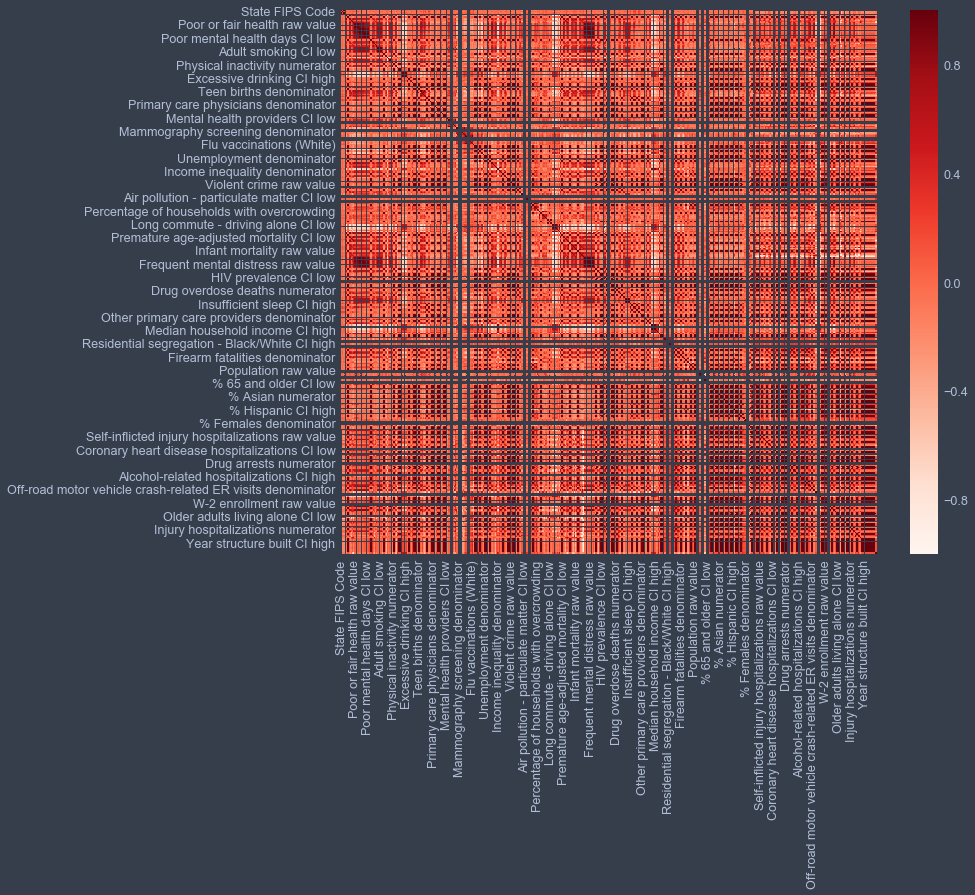

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
cor = df.corr()
svm = sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
figure = svm.get_figure()    
figure.savefig('corr.png', dpi=100)
plt.show()

In [9]:
#Correlation with output variable
cor_target = cor["Premature age-adjusted mortality raw value"]
#Selecting highly correlated features
cor_target.sort_values(ascending = True)[:10]
# relevant_features = cor_target[cor_target>0.4]
# relevant_features

Life expectancy raw value           -0.948598
Life expectancy CI low              -0.939838
Life expectancy (White)             -0.888474
Life expectancy CI high             -0.863605
Reading proficiency raw value       -0.751309
Median household income CI high     -0.670027
Median household income raw value   -0.669252
Income inequality denominator       -0.669174
Median household income CI low      -0.660576
Life expectancy (Black)             -0.646260
Name: Premature age-adjusted mortality raw value, dtype: float64

Heatmap shows dependent variables to clean.

correlation shows have to make denominator/numerator into fraction.


In [10]:
df1 = df[['State Abbreviation','Premature age-adjusted mortality raw value']]
df1 = df1.groupby('State Abbreviation', as_index=False).agg({'Premature age-adjusted mortality raw value': "mean"})
# df1 = df1['State Abbreviation' != "US"]
df1.head()

State Abbreviation  Premature age-adjusted mortality raw value
0                 AK                                  417.015385
1                 AL                                  515.219118
2                 AR                                  510.193421
3                 AZ                                  402.100000
4                 CA                                  330.445763

In [11]:
map_data = dict(type='choropleth',
            locations=df1['State Abbreviation'],
            locationmode='USA-states',
            colorscale='Reds',
            text=df1['State Abbreviation'],
            z=df1["Premature age-adjusted mortality raw value"],
            colorbar=dict(title="Mortality rate")
           )
map_layout = dict(title='USA States Mortality Rate - 2019', geo = {'scope':'usa'})
map_actual = go.Figure(data=[map_data], layout=map_layout)
plot(map_actual, filename = 'stateMort.html', include_plotlyjs='https://cdn.plot.ly/plotly-1.42.3.min.js',auto_open=False)

iplot(map_actual)


In [10]:
# By FIPS 'State FIPS Code', 'County FIPS Code', '5-digit FIPS Code'
# target: 'Mortality Rati' or any var heatmap

In [15]:
from plotly.figure_factory._county_choropleth import create_choropleth
state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

# county 
def county_choropleth(state, df):
    '''
    state (String): state name (ie: New York)
    df (dataframe)
    '''
    df_al = df[df['State Abbreviation'] == state_abbrev[state]]
    fips = df_al['5-digit FIPS Code'].tolist()
    values = (df_al['Premature age-adjusted mortality raw value']).tolist()

#    colorscale = "Viridis"
# colorscale = ["#8dd3c7", "#ffffb3", "#bebada", "#fb8072",
#               "#80b1d3", "#fdb462", "#b3de69", "#fccde5",
#               "#d9d9d9", "#bc80bd", "#ccebc5", "#ffed6f",
#               "#8dd3c7", "#ffffb3", "#bebada", "#fb8072",
#               "#80b1d3", "#fdb462", "#b3de69", "#fccde5",
#               "#d9d9d9", "#bc80bd", "#ccebc5", "#ffed6f",
#               "#8dd3c7", "#ffffb3", "#bebada", "#fb8072",
#               "#80b1d3", "#fdb462", "#b3de69", "#fccde5",
#               "#d9d9d9", "#bc80bd", "#ccebc5", "#ffed6f"]

# endpts = list(np.linspace(0, max(values), len(colorscale) - 1))
    N = 10
    endpts = list(np.linspace(0, max(values), N))

    fig = ff.create_choropleth(
        fips=fips, values=values, scope=[state], show_state_data=True,
        binning_endpoints=endpts,
        show_hover = True,
        colorscale = colorscale,
        plot_bgcolor='rgb(229,229,229)',
        paper_bgcolor='rgb(229,229,229)',
        legend_title='Mortality Rate by County (per 10,000 people)',
        county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    )
    plot(fig, filename = state_abbrev[state] + '.html', include_plotlyjs='https://cdn.plot.ly/plotly-1.42.3.min.js',auto_open=False)
    iplot(fig)

In [14]:
county_choropleth('New York', df)

PlotlyError: You have 11 LEVELS. Your number of colors in 'colorscale' must be at least the number of LEVELS: ['< 0.0', '0.0 - 43.39', '43.39 - 86.78', '86.78 - 130.17', '130.17 - 173.56', '173.56 - 216.94', '216.94 - 260.33', '260.33 - 303.72', '303.72 - 347.11', '347.11 - 390.5', '> 390.5']. If you are using 'binning_endpoints' then 'colorscale' must have at least len(binning_endpoints) + 2 colors

In [13]:
# whole US map split by county
def us_choropleth(df):
    '''
    state (String): state name (ie: New York)
    df (dataframe)
    '''
    fips = df['5-digit FIPS Code'].tolist()
    values = (df['Premature age-adjusted mortality raw value']*10000).tolist()

    colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]
# endpts = list(np.linspace(0, max(values), len(colorscale) - 1))
    N = 10
    endpts = list(np.linspace(0, max(values), len(colorscale) - 1))

    fig = ff.create_choropleth(
        fips=fips, values=values, show_state_data=False,
        binning_endpoints=endpts,
        show_hover = True,
        #colorscale = colorscale,
        plot_bgcolor='rgb(229,229,229)',
        paper_bgcolor='rgb(229,229,229)',
        legend_title='Mortality Rate by County (per 10,000 people)',
#         county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    )
    plot(fig, filename ='us.html', include_plotlyjs='https://cdn.plot.ly/plotly-1.42.3.min.js',auto_open=False)
    iplot(fig)

In [19]:
fig = us_choropleth(df)

C:\Users\steph\AppData\Local\Continuum\anaconda3\lib\site-packages\plotly\figure_factory\_county_choropleth.py:845: UserWarning:

Unrecognized FIPS Values

Whoops! It looks like you are trying to pass at least one FIPS value that is not in our shapefile of FIPS and data for the counties. Your choropleth will still show up but these counties cannot be shown.
Unrecognized FIPS are: [0, 1000, 2000, 4000, 5000, 6000, 8000, 9000, 10000, 11000, 12000, 13000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000, 41000, 42000, 44000, 45000, 46000, 47000, 48000, 49000, 50000, 51000, 53000, 54000, 55000, 56000]



In [ ]:
import plotly.io as pio
pio.write_image(fig, 'map.svg')
pio.write_html(fig, 'map.html')